In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Import dataset**

In [2]:
df=pd.read_csv('/content/first inten project.csv')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
df.columns = df.columns.str.strip()
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [5]:
df['date of reservation']=pd.to_datetime(df['date of reservation'],errors='coerce')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,2018-09-13,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,2017-10-15,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,2018-12-26,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-07-06,Not_Canceled


In [6]:
df.isna().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

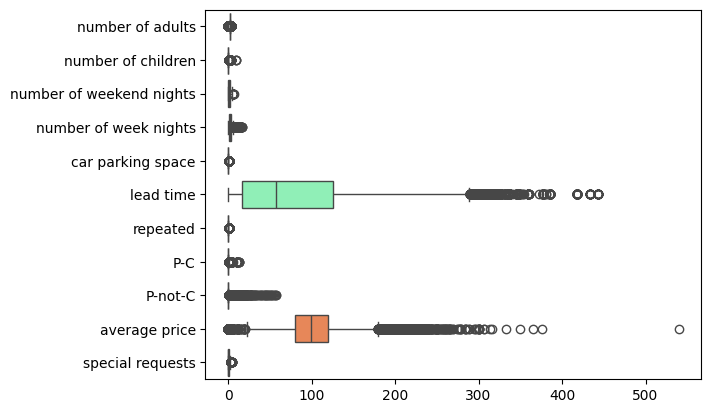

In [9]:
sns.boxplot(data=df,palette='rainbow',orient='h')

/tmp/ipython-input-10-1502431589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead time'])


<Axes: xlabel='lead time', ylabel='Density'>

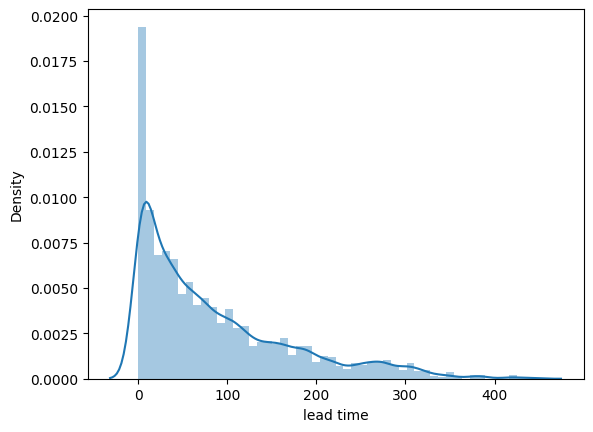

In [10]:
sns.distplot(df['lead time'])

/tmp/ipython-input-11-2856529824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average price'])


<Axes: xlabel='average price', ylabel='Density'>

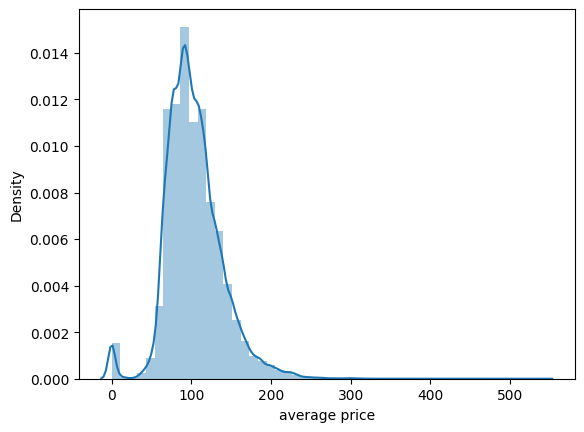

In [11]:
sns.distplot(df['average price'])

In [12]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

# Apply capping to all numeric columns
target_goal = df[['lead time','average price']]

for col in target_goal:
    df = cap_outliers_iqr(df, col)


<Axes: >

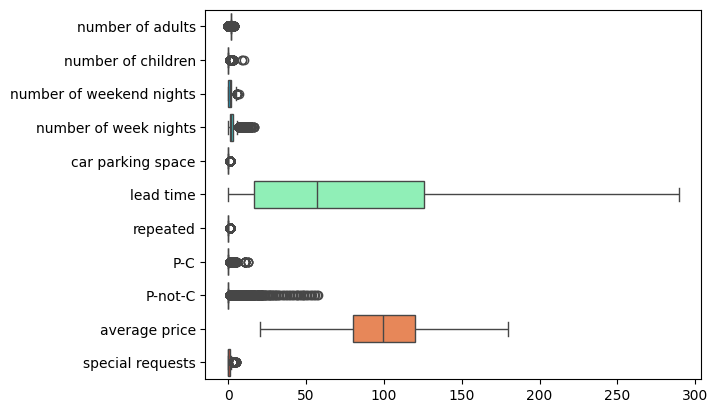

In [13]:
sns.boxplot(data=df,palette='rainbow',orient='h')

In [14]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = pd.get_dummies(df, columns=['market segment type', 'room type', 'type of meal'], drop_first=True,dtype=int)
le = LabelEncoder()
df['booking status'] = le.fit_transform(df['booking status'])
df.head()


/tmp/ipython-input-14-3670790993.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,INN00001,1,1,2,5,0,224.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,INN00002,1,0,1,3,0,5.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,INN00003,2,1,1,3,0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,INN00004,1,0,0,2,0,211.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,INN00005,1,0,1,2,0,48.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
df.drop(columns=['Booking_ID','date of reservation'],axis=1,inplace=True)
df

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,1,1,2,5,0,224.0,0,0,0,88.00,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,0,5.0,0,0,0,106.68,...,1,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1.0,0,0,0,50.00,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,2,0,211.0,0,0,0,100.00,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,2,0,48.0,0,0,0,77.00,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,289.5,0,0,0,115.00,...,1,0,0,0,0,0,0,1,0,0
36281,2,0,1,3,0,34.0,0,0,0,107.55,...,1,0,0,0,0,0,0,0,0,0
36282,2,0,1,3,0,83.0,0,0,0,105.61,...,1,0,0,1,0,0,0,0,0,0
36283,3,0,0,4,0,121.0,0,0,0,96.90,...,0,0,0,0,0,0,0,0,0,0


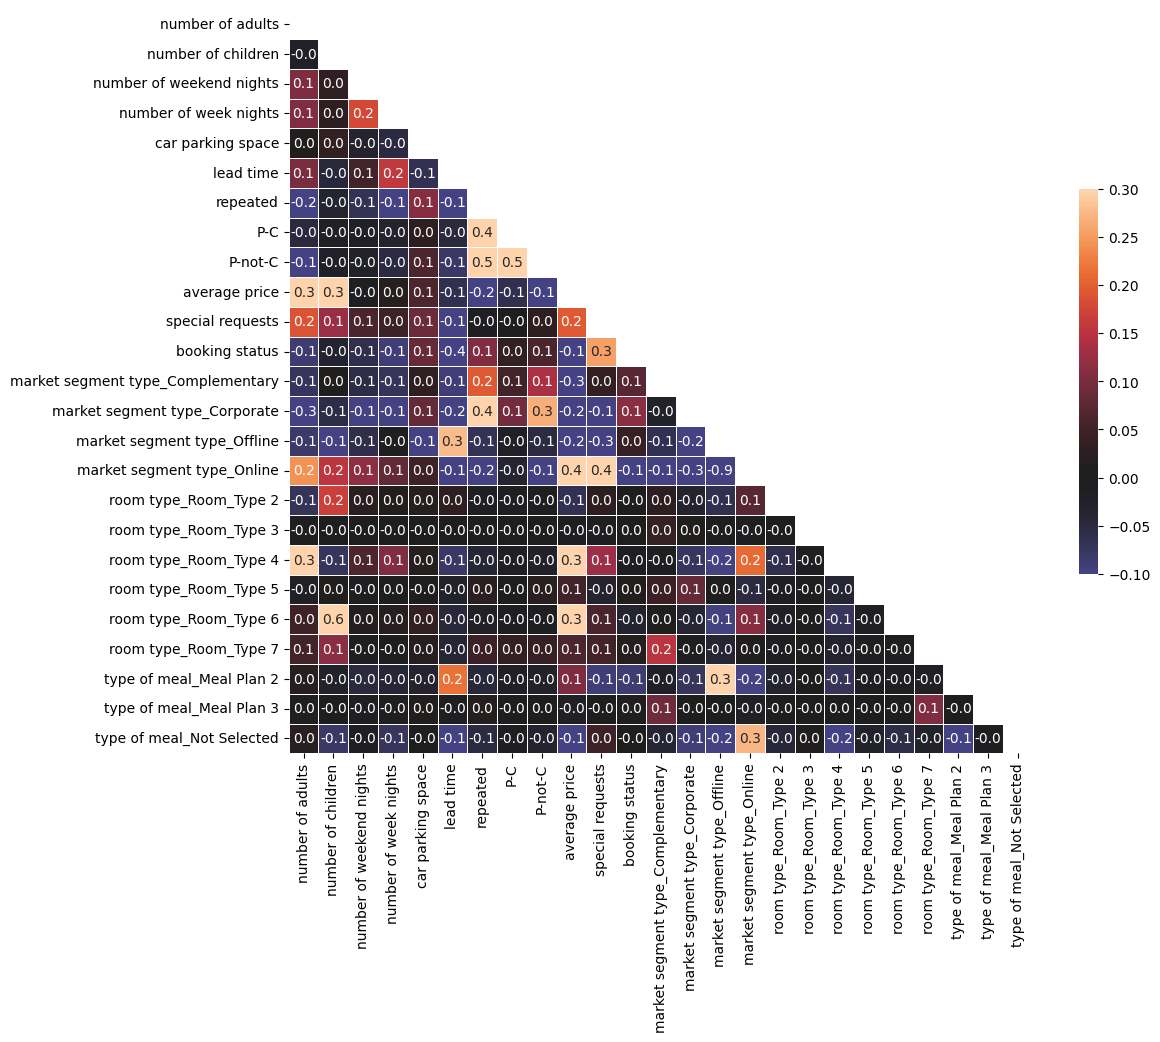

In [16]:
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(
    df.corr(),
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    vmax=0.3,
    vmin=-0.1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.savefig('heatmap.png')

In [17]:
df['total_guests'] = df['number of adults'] + df['number of children']
df['stay_duration'] = df['number of weekend nights'] + df['number of week nights']
df['guest_density'] = df['total_guests'] / (df['stay_duration'] + 1)
df['is_family'] = (df['number of children'] > 0).astype(int)
df['lead_time_category'] = pd.cut(df['lead time'], bins=[-1, 7, 30, 90, 9999], labels=['very_short', 'short', 'medium', 'long'])
df = pd.get_dummies(df, columns=['lead_time_category'], drop_first=True, dtype=int)


In [18]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.85)]
df.drop(columns=to_drop_corr, inplace=True)
print("Dropped columns due to correlation:", to_drop_corr)


Dropped columns due to correlation: ['market segment type_Online', 'stay_duration', 'is_family']


In [19]:
X = df.drop('booking status', axis=1)
y = df['booking status']


In [20]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

booking status
1    24366
0    11882
Name: count, dtype: int64
booking status
1    67.22026
0    32.77974
Name: proportion, dtype: float64


In [21]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced features from {X.shape[1]} to {X_train_pca.shape[1]}")


PCA reduced features from 28 to 22


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7962449984610649
Confusion Matrix:
 [[3909  914]
 [1072 3852]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      4823
           1       0.81      0.78      0.80      4924

    accuracy                           0.80      9747
   macro avg       0.80      0.80      0.80      9747
weighted avg       0.80      0.80      0.80      9747



In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.907356109572176

Confusion Matrix:
 [[4323  500]
 [ 403 4521]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      4823
           1       0.90      0.92      0.91      4924

    accuracy                           0.91      9747
   macro avg       0.91      0.91      0.91      9747
weighted avg       0.91      0.91      0.91      9747

